<a href="https://colab.research.google.com/github/Mousavisp/DL-w-PyTorch-4-Medical-Image/blob/main/5.%20ANN%20Artificial%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
 import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

import time

# PyTorch Gradients

In [101]:
x = torch.tensor(2.0, requires_grad=True)

In [102]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)
type(y)

tensor(63., grad_fn=<AddBackward0>)


torch.Tensor

backprop

In [103]:
y.backward()

slope of x=2, f(x)=63 is x.grad

(putting x=2 in f'(x) gives x.grad)

In [104]:
x.grad

tensor(93.)

In [105]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]],requires_grad=True)

In [106]:
y = 3*x + 2
z = 2*y**2

print(y)
print(z)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)
tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [107]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


performing back-propagation to find the gradient of x with respect to $out$

In [108]:
out.backward()

solving the derivative of $z$ with the **chain rule**: $f(g(x)) = f'(g(x))g'(x)$

In [109]:
x.grad

tensor([[10., 16., 22.],
        [22., 16., 10.]])

# Linear Model

In [110]:
X = torch.linspace(1,50,50).reshape(-1,1)
e = torch.randint(-7,8, X.shape, dtype=torch.float)
y = 2*X + 3 + e

We can't plot a torch datatype, so we need to change it to numpy

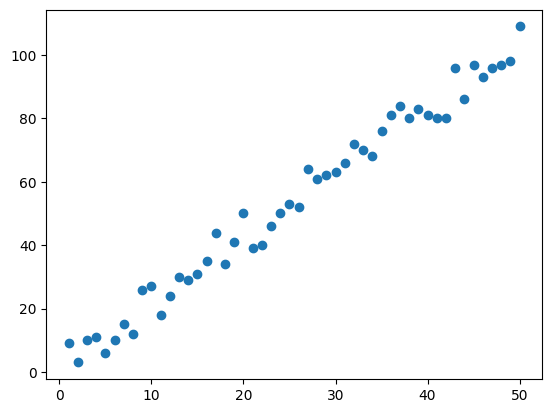

In [111]:
plt.scatter(X.numpy(), y.numpy());

In [112]:
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.6630]], requires_grad=True)
Parameter containing:
tensor([0.8737], requires_grad=True)


In [113]:
class Model(nn.Module):

    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [114]:
model = Model(1,1)

for name,param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.15074050426483154
linear.bias 	 0.5460145473480225


In [115]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [116]:
epochs = 50
losses = list()

for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss)
    print(f"epoch {i}, loss: {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1, loss: 3205.1376953125, weight: 0.15074050426483154, bias: 0.5460145473480225
epoch 2, loss: 1663.293701171875, weight: 3.4591119289398193, bias: 0.6447547674179077
epoch 3, loss: 867.2957763671875, weight: 1.0819741487503052, bias: 0.5745705366134644
epoch 4, loss: 456.3501281738281, weight: 2.789961338043213, bias: 0.6257607340812683
epoch 5, loss: 244.19375610351562, weight: 1.5627237558364868, bias: 0.5897411704063416
epoch 6, loss: 134.664794921875, weight: 2.4444901943206787, bias: 0.6163827776908875
epoch 7, loss: 78.11886596679688, weight: 1.810904860496521, bias: 0.5980010032653809
epoch 8, loss: 48.926109313964844, weight: 2.2661232948303223, bias: 0.6119688749313354
epoch 9, loss: 33.85481262207031, weight: 1.9390192031860352, bias: 0.6026926636695862
epoch 10, loss: 26.073945999145508, weight: 2.1740260124206543, bias: 0.6101173162460327
epoch 11, loss: 22.056852340698242, weight: 2.0051474571228027, bias: 0.6055417656898499
epoch 12, loss: 19.982881546020508, weigh

In [117]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

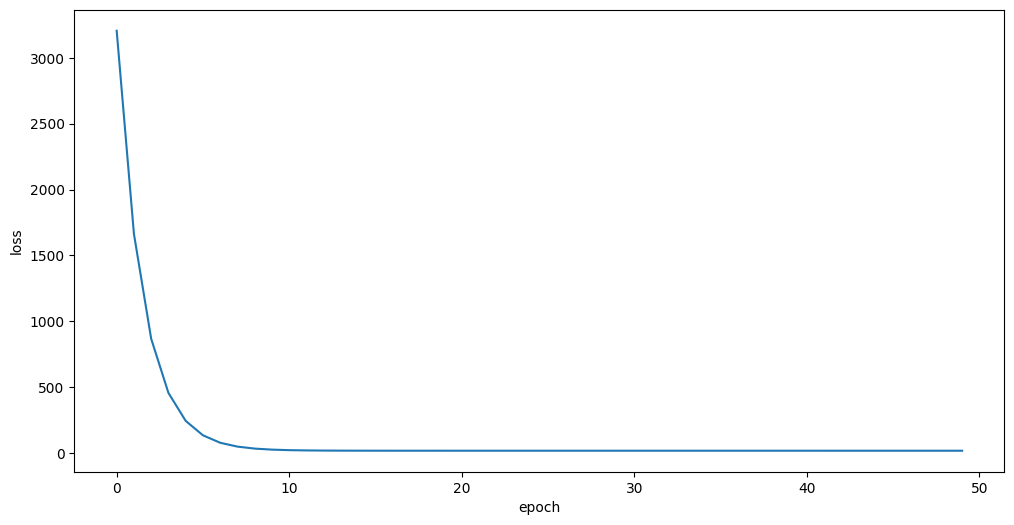

In [118]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss');

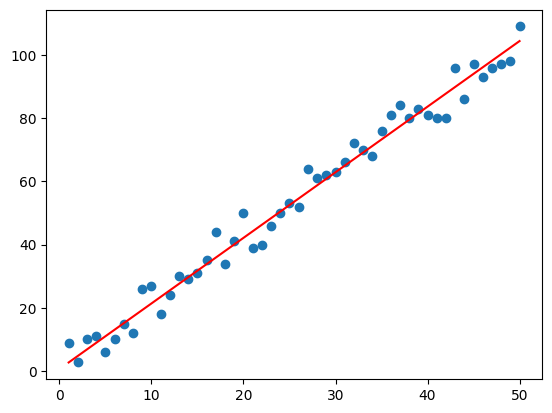

In [119]:
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*X + current_bias

plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), predicted_y, 'r');

# Fully Connected NN

In [120]:
class Model(nn.Module):

    def __init__(self,in_features=4,h1=8,h2=10,out_features=3):

        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)


    def forward(self,x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [121]:
model = Model()

In [122]:
df = pd.read_csv('iris.csv')

In [123]:
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
135,7.7,3.0,6.1,2.3,2.0
23,5.1,3.3,1.7,0.5,0.0
109,7.2,3.6,6.1,2.5,2.0


In [124]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [126]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [127]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [128]:
epochs = 250
losses = list()

for i in range(epochs):
    # Forward Propagation
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i % 10 == 0:
        print(f"Epoch: {i} Loss: {loss}")

    # Back Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.1700356006622314
Epoch: 10 Loss: 0.9422596096992493
Epoch: 20 Loss: 0.634901762008667
Epoch: 30 Loss: 0.41852712631225586
Epoch: 40 Loss: 0.3022810220718384
Epoch: 50 Loss: 0.21046628057956696
Epoch: 60 Loss: 0.14717361330986023
Epoch: 70 Loss: 0.11325249075889587
Epoch: 80 Loss: 0.09589435160160065
Epoch: 90 Loss: 0.08577032387256622
Epoch: 100 Loss: 0.07911562919616699
Epoch: 110 Loss: 0.07436120510101318
Epoch: 120 Loss: 0.07078591734170914
Epoch: 130 Loss: 0.06799554079771042
Epoch: 140 Loss: 0.06575086712837219
Epoch: 150 Loss: 0.06389965116977692
Epoch: 160 Loss: 0.062339190393686295
Epoch: 170 Loss: 0.06099884957075119
Epoch: 180 Loss: 0.059828441590070724
Epoch: 190 Loss: 0.05879167839884758
Epoch: 200 Loss: 0.057862091809511185
Epoch: 210 Loss: 0.0570199154317379
Epoch: 220 Loss: 0.056250493973493576
Epoch: 230 Loss: 0.05554267019033432
Epoch: 240 Loss: 0.0548880435526371


In [129]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

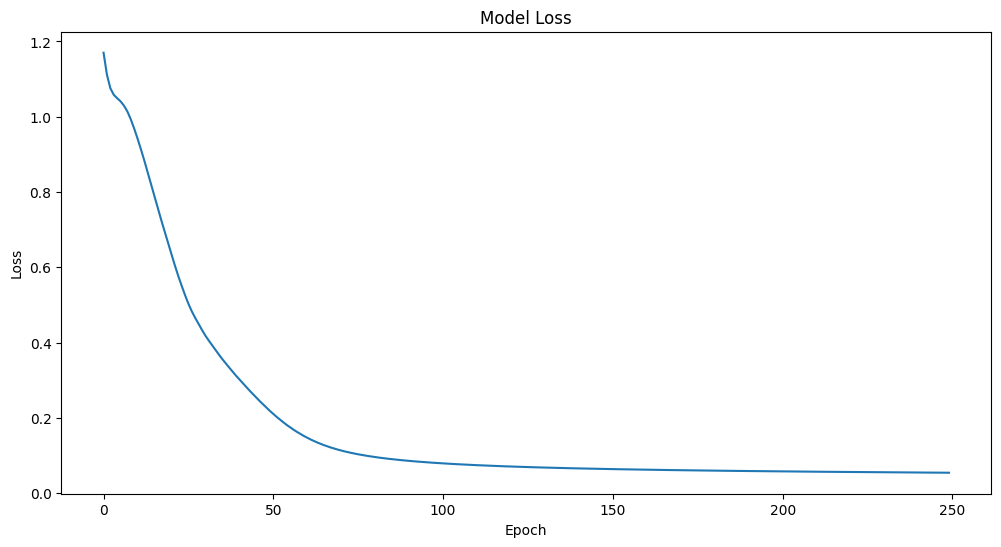

In [130]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss');

In [131]:
correct = 0
with torch.no_grad():
    for idx,data in enumerate(X_test):
        y_val = model.forward(data)
        if y_val.argmax().item() == y_test[idx]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')


30 out of 30 = 100.00% correct


In [132]:
torch.save(model.state_dict(), 'Iris_Model.pt')

In [133]:
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)

# Full ANN Regression

## Feature Extraction

In [134]:
df = pd.read_csv('NYCTaxiFares.csv')

In [135]:
df.head(3)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2


In [136]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [138]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [139]:
df['isweekend'] = df.pickup_datetime.dt.weekday > 4

In [140]:
def haversine_distance(df, lat1, long1, lat2, long2):

    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [141]:
df['distance_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

Changing UTC time to NYC time

In [142]:
df['pickup_datetime'] = df.pickup_datetime - pd.Timedelta(hours=4)

In [143]:
df['hour'] = df.pickup_datetime.dt.hour

In [144]:
df['AM_or_PM'] = np.where(df.hour < 12, 'PM', 'AM')

In [145]:
cat_cols = ['isweekend','hour',	'AM_or_PM']
cont_cols = ['passenger_count', 'distance_km']

In [146]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [147]:
df['AM_or_PM'].cat.categories

Index(['AM', 'PM'], dtype='object')

In [148]:
df['AM_or_PM'].values

['PM', 'PM', 'PM', 'AM', 'AM', ..., 'PM', 'PM', 'AM', 'PM', 'AM']
Length: 120000
Categories (2, object): ['AM', 'PM']

In [149]:
df['AM_or_PM'].cat.codes

0         1
1         1
2         1
3         0
4         0
         ..
119995    1
119996    1
119997    0
119998    1
119999    0
Length: 120000, dtype: int8

In [150]:
df['AM_or_PM'].cat.codes.values

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [151]:
cats = torch.tensor(np.stack([df[col].cat.codes.values for col in cat_cols],axis=1),dtype=torch.int)

In [152]:
conts = torch.tensor(np.stack([df[col].values for col in cont_cols],axis=1),dtype=torch.float)

In [153]:
y = torch.tensor(df['fare_amount'],dtype=torch.float)

In [154]:
cat_sizes = [len(df[col].cat.categories) for col in cat_cols]
embedding_sizes = [(size,min(50,(size+1)//2)) for size in cat_sizes]
embedding_sizes

[(2, 1), (24, 12), (2, 1)]

In [155]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in embedding_sizes])

type(list(enumerate(selfembeds))[0][1])

torch.nn.modules.sparse.Embedding

## Tabular Model

In [156]:
 class TabularModel (nn.Module):

    def __init__(self, emb_szs, n_conts, out_sz, layers, p=0.5):

        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_conts)

        layerslist = list()
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_conts

        for i in layers:
            layerslist.append(nn.Linear(n_in, i))
            layerslist.append(nn.ReLU(inplace=True))
            layerslist.append(nn.BatchNorm1d(i))
            layerslist.append(nn.Dropout(p))
            n_in = i

        layerslist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerslist)


    def forward(self, x_cat, x_cont):

        embeddings = list()

        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))

        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat ([x, x_cont], 1)
        x = self.layers(x)

        return x

For Classification, we set the `out_sz` equal to the number of classes. (for binary `out_sz = 2`)

In [157]:
model = TabularModel(embedding_sizes, conts.shape[1], 1, [200,100], p=0.4)

In [158]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(24, 12)
    (2): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=16, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [159]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

For Classification problems, we choose CrossEntropy as our loss function.

`criterion = nn.CrossEntropyLoss()`

### Train Test Split

In [160]:
batch_size = 60000
test_size = int(batch_size * 0.2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]

con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

### Model Training

In [ ]:
start_time = time.time()

epochs = 300
losses = list()

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)

    if i%10 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

epoch:   1  loss: 12.60579491
epoch:  11  loss: 12.54256535
epoch:  21  loss: 12.48777294
epoch:  31  loss: 12.41508865
epoch:  41  loss: 12.31355572
epoch:  51  loss: 12.18220520
epoch:  61  loss: 12.01717854
epoch:  71  loss: 11.82378769
epoch:  81  loss: 11.58223057
epoch:  91  loss: 11.32539749
epoch: 101  loss: 11.02207184
epoch: 111  loss: 10.71096134
epoch: 121  loss: 10.37165356


In [ ]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.title('Model Loss');

In [ ]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

In [ ]:
print(f'{"Predicted":>12} {"Actual":>8} {"Diff":>8}')
for i in range(50):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

In [ ]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareRegrModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')